In [1]:
%matplotlib inline
import matplotlib
from matplotlib import animation
from numpy import append, cos, linspace, pi, sin, zeros
import matplotlib.pyplot as plt

In [5]:
#parameters
parameters = [50 - 15j, 5 + 2j, -10 - 10j, -14 - 60j, -15 + 30j]


def fourier(t, C):
    f = zeros(t.shape)  #len(f) = len(t)
    for k in range(len(C)):
        f += C.real[k] * cos(k * t) + C.imag[k] * sin(k * t)
    return f


def hippo(t, p):
    npar = 6

    Cx = zeros((npar,), dtype='complex')
    Cy = zeros((npar,), dtype='complex')

    Cx[1] = p[0].real * 1j
    Cy[1] = p[3].imag + p[0].imag * 1j
    Cx[2] = p[1].real * 1j
    Cy[2] = p[1].imag * 1j
    Cx[3] = p[2].real
    Cy[3] = p[2].imag * 1j
    Cx[5] = p[3].real

    #x: concatenate fourier(t, Cy) series (with len(t)) and a number [p[4].imag], so len(x)=t+1; same as to y
    x = append(fourier(t, Cy), [p[4].imag])   
    y = -append(fourier(t, Cx), [-p[4].imag])
    return x, y

# For function–animation.FuncAnimation

def init_plot():
    # draw the body part and save
    x, y = hippo(linspace(2 * pi + 0.9 * pi, 0.4 + 3.3 * pi, 1000), parameters) #len(x)=len(y) = 1000+1
    
    for ii in range(len(y) - 1):
        y[ii] -= sin(((x[ii] - x[0]) * pi / len(y))) * sin(float(0)) * parameters[4].real
        # y series are still the same after updating, since sin(float(0))=0
    
    nose.set_data(x, y)  #trunk: the initialized plot (predefined); trunk.set_data(x, y): updated plot by drawing (x, y)
    return nose,


def move_nose(i):
    x, y = hippo(linspace(2 * pi + 0.75 * pi, 0.4 + 3.3 * pi, 1000), parameters)
    
    for ii in range(len(y) - 1):
        y[ii] -= sin(((x[ii] - x[0]) * pi / len(y))) * sin(float(i)) * parameters[4].real
    nose.set_data(x, y)
    return nose,


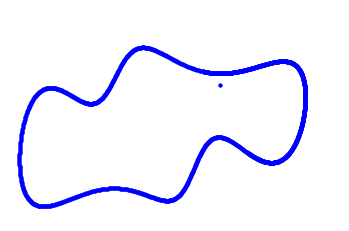

In [6]:
from IPython.display import HTML

fig, ax = plt.subplots()

x, y = hippo(t=linspace(0.4 + 1.3 * pi, 2 * pi + 0.9 * pi, 1000), p=parameters)
plt.plot(x, y, 'b.')
plt.xlim([-75, 90])
plt.ylim([-70, 87])
plt.axis('off')
nose, = ax.plot([], [], 'b.')  # initialize trunk

ani = animation.FuncAnimation(fig=fig,
                              func=move_nose,
                              frames=1000,  #frames: frame number = i
                              init_func=init_plot,
                              interval=100, #Delay between frames in milliseconds; total time = frames*(interval/1000)=100
                              blit= True,
                              repeat=True)
# plt.show()
ani

In [7]:
HTML(ani.to_html5_video())